# Lecture 6: Numerical and graphical techniques II (multivariate)

## Lecture overview

1. [Numerical and graphical techniques](#section1)
2. [Phase-line diagrams](#section2)
3. [Phase-plane diagrams](#section3)

<span id='section1'></span>
## 1. Numerical and graphical techniques
<hr>

In the last lecture we talked about two numerical/graphical approaches to get a better understanding of our models:

- Plotting a variable as a function of time (eg, $p(t)$ as a function of $t$)
- Plotting a variable as a function of itself (eg, $p(t+1)$ as a function of $p(t)$). 

The latter works well for models with one variable.

In this lecture we’re going to talk about a third numerical technique, a **phase-plane diagram**, which is especially useful for models that have two variables.

<span id='section2'></span>
## 2. Phase-line diagrams
<hr>

Before looking at models with two variables, let’s first consider some with only one.

Consider again haploid selection where

$$
p(t+1) = \frac{W_Ap(t)}{W_Ap(t) + W_a(1-p(t))}
$$

Last time we plotted $p_{t + 1}$ as a function of $p(t)$ and used this to examine the dynamics starting from any initial value. We called this plot a **cob-web** plot.

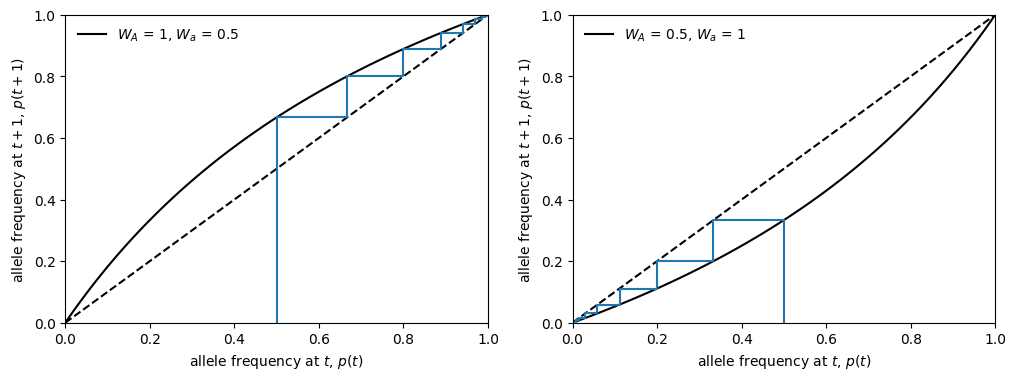

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

# Build cobweb plotting function
def cobweb_haploid(p0, WA, Wa, max=np.inf):
    t, pnow, pnext = 0, p0, 0 #initial conditions
    while t <= max:
        yield pnow, pnext #current value of p(t) and p_(t+1)
        pnext = (WA * pnow) / (WA * pnow + Wa * (1 - pnow)) #update p_(t+1)
        yield pnow, pnext #current value of p(t) and p_(t+1)
        pnow = pnext #update p(t)
        t += 1 #update t
        
# Build function for generating figure
def plot_haploid_selection(WA, Wa, p0=0.5, ax=None):
    pt = sympy.symbols('pt') #define our variable p(t)

    # Write out sympy equation
    f = (WA * pt) / (WA * pt + Wa * (1 - pt)) #the recursion equation

    # Compute function over a set of points in [0,1] by 'lambdifying' sympy equation (turn it into a function)
    t = np.linspace(0,1,100)
    fy = sympy.lambdify(pt, f)(t)

    # Build plot
    if ax == None:
        fig, ax = plt.subplots()
    ax.plot(t, fy, color='black', label=f"$W_A$ = {WA}, $W_a$ = {Wa}") #plot p_(t+1) as function of p(t)
    ax.plot(t, t, color='black', linestyle='--') #draw 1:1 line for reference
    
    # Add cobweb
    cobweb = np.array([p for p in cobweb_haploid(p0, WA, Wa, max=100)])
    ax.plot(cobweb[:,0], cobweb[:,1])
    
    # Annotate and label plot
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel("allele frequency at $t$, $p(t)$")
    ax.set_ylabel("allele frequency at $t+1$, $p(t+1)$")
    ax.legend(frameon=False)
    return ax

# Plot figure
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,4)

# First cobweb with WA > Wa
plot_haploid_selection(WA = 1, Wa = 0.5, ax=ax[0])

# Second cobweb with WA < Wa
plot_haploid_selection(WA = 0.5, Wa = 1, ax=ax[1])

plt.show()

Now let's simplify the cob-web plot and just indicate the direction (and magnitude) of change in $p(t)$ with time. This is known as a **phase-line diagram** with a **vector field** (the arrows).

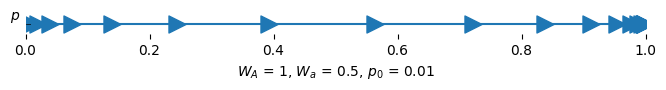

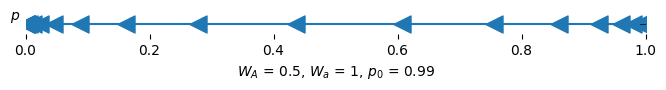

In [3]:
def phase_line_haploid(p0, WA, Wa, max=np.inf):
    'generator for p(t)'
    t, pnow, pnext = 0, p0, 0 #initial conditions
    while t < max:
        yield pnow #current value of p(t) and p_(t+1)
        pnext = (WA * pnow) / (WA * pnow + Wa * (1 - pnow))
        pnow = pnext #update p(t)
        t += 1 #update t

def plot_phase_line_haploid(WA, Wa, p0, max=20, ax=None):
    'plot phase line'
    
    # Set up figure
    if ax==None:
        fig, ax = plt.subplots()
        fig.set_size_inches(8,0.25)
    ax.axhline(0, color='black', linewidth=0.5)
    
    # Plot phase-line
    pts = [pt for pt in phase_line_haploid(p0, WA, Wa, max=max)] #pt values
    ax.plot(
        pts,
        np.zeros(max) #dummy y values (0 for all x values) because we want to plot a 1d line
    )
    
    # Plot vector field
    marker = '>' if pts[2] > pts[1] else '<' #determine which direction to point based on first 2 time points
    ax.scatter(
        pts,
        np.zeros(max),#dummy y again
        marker=marker, s=150
    )
    
    # Remove background axes
    ax.set_ylabel('$p$', rotation=0)
    ax.set_xlabel(f"$W_A$ = {WA}, $W_a$ = {Wa}, $p_0$ = {p0}")
    ax.get_yaxis().set_ticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlim(0,1)
    plt.show()
    
plot_phase_line_haploid(WA=1, Wa=0.5, p0=0.01)

plot_phase_line_haploid(WA=0.5, Wa=1, p0=0.99)

As in the cob-web plots, we see the allele frequency approaches $p=1$ when $W_A>W_a$ and $p=0$ when $W_a>W_A$. We also notice, as above, the changes are fastest (fewer, longer arrows) at intermediate frequencies.

Similarly, with the more complex model of diploid selection

$$
p(t+1) = \frac{W_{AA}p(t)^2 + W_{Aa}p(t)q(t)}{W_{AA}p(t)^2 + W_{Aa}p(t)q(t) + W_{aa}q(t)^2}
$$

we can draw a phase-line diagram and vector field for a set of parameter values.

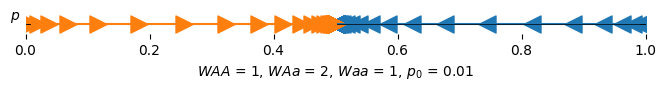

In [4]:
def phase_line_diploid(p0, WAA, WAa, Waa, max=np.inf):
    'generator for p(t)'
    t, pnow, pnext = 0, p0, 0 #initial conditions
    while t < max:
        yield pnow #current value of p(t) and p(t+1)
        pnext = (WAA * pnow**2 + WAa * pnow * (1 - pnow)) / (WAA * pnow**2 + WAa * 2 * pnow * (1 - pnow) + Waa * (1 - pnow)**2) #update p(t+1)
        pnow = pnext #update p(t)
        t += 1 #update t
        
def plot_phase_line_diploid(WAA, WAa, Waa, p0, max=20, ax=None):
    'plot phase line'
    
    # set up figure
    if ax==None:
        fig, ax = plt.subplots()
        fig.set_size_inches(8,0.25)
    ax.axhline(0, color='black', linewidth=0.5)
    
    # Plot phase-line
    pts = [pt for pt in phase_line_diploid(p0, WAA, WAa, Waa, max=max)]
    ax.plot(
        pts,
        np.zeros(max),
        alpha=1
    )
    
    # Plot phase-line markers
    marker = '>' if pts[2] > pts[1] else '<'
    ax.scatter(
        pts,
        np.zeros(max),
        marker=marker, s=150
    )
    
    ax.set_xlabel(f"$WAA$ = {WAA}, $WAa$ = {WAa}, $Waa$ = {Waa}, $p_0$ = {p0}")
    
    return ax

# Plot figure
fig, ax = plt.subplots()
fig.set_size_inches(8,0.25)
    
plot_phase_line_diploid(WAA=1, WAa=2, Waa=1, p0=0.99, max=100, ax=ax) #higher starting allele frequency
plot_phase_line_diploid(WAA=1, WAa=2, Waa=1, p0=0.01, max=100, ax=ax) #low starting allele frequency

# Remove background axes
ax.set_ylabel('$p$', rotation=0)
ax.get_yaxis().set_ticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlim(0,1)
plt.show()

Notice that this time we chose two initial frequencies for the same plot (orange vs blue), to show that under **heterozygote advantage** ($W_{AA}<W_{Aa}>W_{aa}$) the allele frequency approaches an intermediate value from either direction. 

<span id='section3'></span>
## 3. Phase-plane diagrams
<hr>

Now let’s extend this technique from one to two variables.

### Lotka-Volterra model

We'll introduce a new model for this purpose, the **Lotka-Volterra** model of
competition (see section 3.4.1 in the text).

This is an extension of the logistic growth model (Lecture 3) to include competition between
multiple species (in our case two).

Let the population size of each species be $n_1(t)$ and $n_2(t)$. These are our two
variables.

And let them have different intrinsic growth rates, $r_1$ and $r_2$, and carrying capacities,
$K_1$ and $K_2$.

To model competition, we’ll assume that, for an individual of species $i$, an individual
of species $j$ is the competitive equivalent of $\alpha_{ij}$ individuals of species $i$. We then have

$$
n_1(t+1) = n_1(t)\left( 1 + r_1 \left(1 - \frac{n_1(t) + \alpha_{12}n_2(t)}{K_1}\right)\right)
$$

$$
n_2(t+1) = n_2(t) \left(1 + r_2 \left(1 - \frac{n_2(t) + \alpha_{21}n_1(t)}{K_2}\right)\right)
$$

Often individuals of the same species will use more similar resources and therefore competition will be less severe with individuals of the other species, $0 < \alpha_{ij} < 1$, but not always. And, in fact, we could model other types of interactions (eg, mutualism) by making some of the interactions beneficial, $\alpha_{ij} < 0$.

### Phase-planes and vector fields

So why did we introduce the Lotka-Volterra model? Well, **phase-plane diagrams** are plots of one variable against another ($n_1$ vs. $n_2$), on which we can plot **vector fields**, vectors originating from many different starting conditions that indicate the direction and magnitude of change in the two variables. With this we can graphically investigate the dynamics of the Lotka-Volterra model by first defining the rates of change in our two variables, $\Delta n_1$ and $\Delta n_2$ and then choosing some parameter values to explore.

$$
\Delta n_1 \equiv n_1(t+1) - n_1(t) = n_1(t)r_1\left(1 - \frac{n_1(t) + \alpha_{12}n_2(t)}{K_1}\right)
$$

$$
\Delta n_2 \equiv n_2(t+1) - n_2(t) = n_2(t)r_2\left(1 - \frac{n_2(t) + \alpha_{21}n_1(t)}{K_2}\right)
$$

Let's plot a phase-plane for the Lotka-Volterra with the following parameter values: $r_1 = 0.5, r_2 = 0.5, K_1 = 1000, K_2 = 1000, \alpha_{12} = 0.5, \alpha_{21} = 0.5$.

In [6]:
# Define a function to plot the phase plane and vector field for n1 and n2
def plot_vector_field(dn1, dn2, xlim=(0,1200), ylim=(0,1200), n_steps=25, width=8, height=6, show=False, axes_labels=[None, None]):
    # Set x and y ranges 
    xrange, yrange = np.linspace(xlim[0], xlim[1], n_steps), np.linspace(ylim[0], ylim[1], n_steps)

    # Initialize 2D grid with x,y values and additional grids to track derivatives
    X, Y = np.meshgrid(xrange, yrange)
    U, V = np.zeros(X.shape), np.zeros(Y.shape)

    # Compute the gradient at each x,y position
    for i in range(len(xrange)):
        for j in range(len(xrange)):
            U[i,j] = sympy.lambdify((n1, n2), dn1)(X[i,j], Y[i,j]) #change in n1
            V[i,j] = sympy.lambdify((n1, n2), dn2)(X[i,j], Y[i,j]) #change in n2

    # Plot figure
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.set_xlabel(axes_labels[0])
    ax.set_ylabel(axes_labels[1])
    ax.quiver(X,Y,U,V, linewidth=1) #from point X,Y draw arrow moving U in x-axis and V in y-axis

    if show == True:
        plt.show()
    else:
        return ax

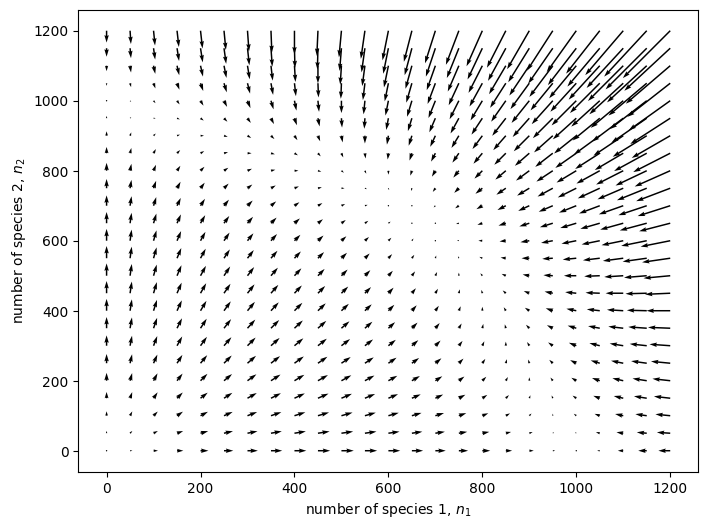

In [7]:
# Initialize the sympy variables
n1, n2 = sympy.symbols('n1, n2')

# Choose the parameter values
r1, r2 = 0.5, 0.5
k1, k2 = 1000, 1000
a12, a21 = 0.5, 0.5

# Specify the difference equations
dn1 = r1 * n1 * (1 - (n1 + a12 * n2) / k1)
dn2 = r2 * n2 * (1 - (n2 + a21 * n1) / k2)

# Plot the vector field
plot_vector_field(dn1, dn2, axes_labels=["number of species 1, $n_1$", "number of species 2, $n_2$"])

plt.show()

With this approach we see that the dynamics appear to be approaching a value near $n_1 = 700, n_2 = 700$ from nearly any initial condition.

### Null clines


To better understand the dynamics, we can ask for what values of our variables ($n_1, n_2$) is the change in our variables zero ($\Delta n_1 = 0$, $\Delta n_2 = 0$). These values are known as **null clines**.

Concretely, going back to our previous formula for the change in $n_1$ and $n_2$ in the Lotka-Volterra model

$$
\Delta n_1 = n_1(t)r_1\left(1 - \frac{n_1(t) + \alpha_{12}n_2(t)}{K_1}\right)
$$

$$
\Delta n_2 = n_2(t)r_2\left(1 - \frac{n_2(t) + \alpha_{21}n_1(t)}{K_2}\right)
$$

We want to know when $\Delta n_1$ and $\Delta n_2$ are 0. Solving for these inequalities shows that

$$
\Delta n_1 = 0 \Longrightarrow n_1(t) = 0, 1 - \frac{n_1(t) + \alpha_{12}n_2(t)}{K_1} = 0
$$

$$
\Delta n_2 = 0 \Longrightarrow n_2(t) = 0, 1 - \frac{n_2(t) + \alpha_{21}n_1(t)}{K_2} = 0
$$

Plotting these null clines on the phase-plane diagram, we get

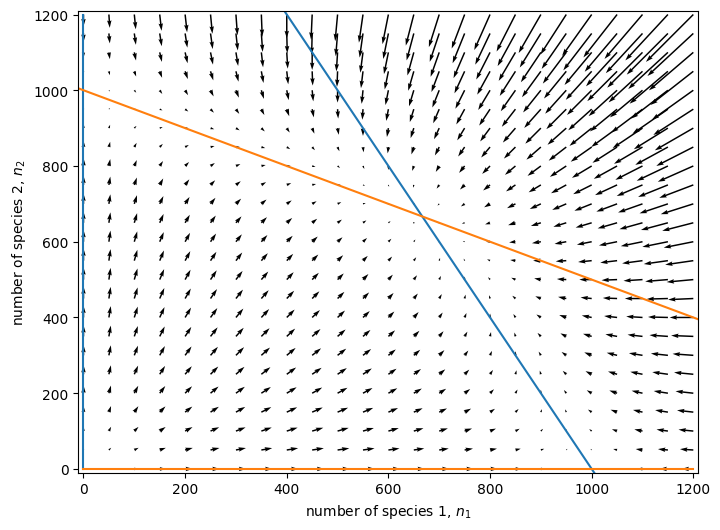

In [24]:
# Initialize plot and ranges
ax = plot_vector_field(dn1, dn2, axes_labels=["number of species 1, $n_1$", "number of species 2, $n_2$"])
xrange, yrange = np.linspace(0, 1200, 100), np.linspace(0, 1200, 100)

def plot_nullclines(ax):
    #plot the null clines for species 1 (blue)
    nullcline_1 = [list(i.values())[0] for i in sympy.solve(sympy.Eq(dn1, 0))]
    ax.plot(xrange, sympy.lambdify(n1, nullcline_1[1])(xrange), color=plt.cm.tab10(0)) # this null cline is a function of n1 (i.e. x)
    ax.plot([nullcline_1[0] for _ in xrange], yrange, color=plt.cm.tab10(0))
    
    # #plot the null clines for species 2 (red)
    nullcline_2 = [list(i.values())[0] for i in sympy.solve(sympy.Eq(dn2, 0))]
    ax.plot(sympy.lambdify(n2, nullcline_2[0])(yrange), yrange, color=plt.cm.tab10(1)) # this null cline is a function of n2 (i.e. y)
    ax.plot(xrange, [nullcline_2[1] for _ in yrange], color=plt.cm.tab10(1))

    ax.set_ylim(-10, 1210)
    ax.set_xlim(-10, 1210)
    return ax

plot_nullclines(ax)
plt.show()

The null clines (blue for $n_1$ and orange for $n_2$) help us understand the dynamics. In each area bounded by null clines the vectors point in the same general direction (eg, in the top right area they point down and to the left). This helps us see where the dynamics are heading -- in this case most initial conditions head to the intersection of the non-zero null clines for $n_1$ and $n_2$, near $n_1=700$ and $n_2=700$. Note that where the null cline of one variable intersects a null cline of the other variable neither variable is changing, indicating **equilibria**.

We can also make phase diagrams for continuous-time models, just using differential equations in place of difference equations.

We’ll see an example of that for another model, of predator and prey, in Lab 3.